<img src="imgs/logo-spegc.svg" width=30%>

# Regresión Logística

La regresión logística es similar a la regresión lineal, pero, en este caso, los valores de $y$ son discretos. Esto convierte a la regresión logística en una herramienta para realizar clasificación, no regresión. Por ahora trabajaremos con clasificación binaria, de esta forma los valores de $y$ serán $0$ o $1$.

Este método, a pesar de su nombre, lleva a cabo la clasificación de un conjunto de muestras de dos clases diferentes.

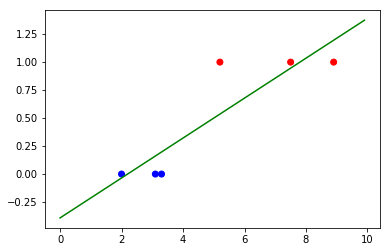

In [4]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Create linear regression object
regr = linear_model.LinearRegression()

samples = np.array([2.0, 3.1, 3.3, 5.2, 7.5, 8.9])
labels = np.array([0, 0, 0, 1, 1, 1])
colors = ['r'*c + 'b'*(1-c) for c in labels]

regr.fit(samples.reshape(len(samples), 1), labels.reshape(len(labels), 1))

x = np.arange(0,10,0.1)
y = regr.predict(x.reshape(len(x),1))

plt.scatter(samples, labels, c=colors)
plt.plot(x, y, 'g')
plt.show()

In [6]:
import pandas as pd

d = {'Sample' : pd.Series(samples),
      'Label' : pd.Series(labels)}

df = pd.DataFrame(d)
print(df)

   Label  Sample
0      0     2.0
1      0     3.1
2      0     3.3
3      1     5.2
4      1     7.5
5      1     8.9


## Función Sigmoide

Esta función nos permite "doblar" la recta.

$$y=\frac{1}{1+e^{-x}}$$

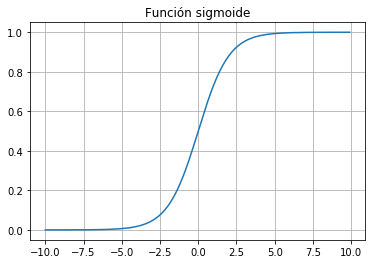

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

x = np.arange(-10,10,0.1)
y = 1/(1+np.exp(-x))
plt.title("Función sigmoide")
plt.plot(x,y)
plt.grid(True)
plt.show()

## Función de coste de la Regresión Logística

A diferencia de la regresión lineal, la regresión logística aplica la función sigmoide para adaptar la recta de regresión a los valores binarios de la clasificación. Esto provoca un problema en la función de coste, ahora esta función no es convexa. Es decir, puede presentar mínimos locales que atrapen al descenso por el gradiente.

In [2]:
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

plotly.offline.init_notebook_mode(connected=True)

samples = np.array([2.0, 3.1, 3.3, 5.2, 7.5, 8.9])
labels = np.array([0, 0,1, 1, 0, 1])

# Make data.
m = np.arange(-10, 10, 0.1)
b = np.arange(-10, 10, 0.1)
M, B = np.meshgrid(m, b)

loss = 0
lossLog = 0

samples_to_use = 6

for sample, label in zip(samples[:samples_to_use], labels[:samples_to_use]):    
    R = (M*sample + B) 
    Z = (1/(1+np.exp(-R)) - label)**2
        
    loss += Z
    #lossLog += -np.log(Z)
   
   
data = go.Surface(
        opacity=1.,
        x = m,
        y = b,
        z = loss
    )

# dataLog = go.Surface(
#        opacity=1.,
#        x = m,
#        y = b,
#        z = lossLog
#    )

layout = go.Layout(
    title='Error de la regresión logística',
    autosize=False,
    width=700,
    height=700,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

# data = [data, dataLog]
data = [data]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

### ¿Cómo evitar el problema de múltiples mínimos locales?

Aplicando $-Log(x)$ a la función hipótesis $h_{\theta}$.

In [4]:
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

plotly.offline.init_notebook_mode(connected=True)

samples = np.array([2.0, 3.1, 3.3, 5.2, 7.5, 8.9])
labels = np.array([0, 0,1, 1, 0, 1])

# Make data.
m = np.arange(-5, 5, 0.1)
b = np.arange(-5, 5, 0.1)
M, B = np.meshgrid(m, b)

loss = 0
lossLog = 0

samples_to_use = 6

for sample, label in zip(samples[:samples_to_use], labels[:samples_to_use]):    
    R = (M*sample + B) 
    Zmls = (1/(1+np.exp(-R)) - label)**2
    Z = 1/(1+np.exp(-R))
    
    if label==1:
        Z = -np.log(Z)
    else:
        Z = -np.log(1.0-Z)
        
    #Z = -(np.log(1.0-Z) * (1.0-label) + np.log(Z) * label)
    
    
    loss += Zmls
    lossLog += Z
   
   
data = go.Surface(
        opacity=1.,
        x = m,
        y = b,
        z = loss
    )

dataLog = go.Surface(
        opacity=1.,
        x = m,
        y = b,
        z = lossLog
    )

layout = go.Layout(
    title='Error de la regresión logística',
    autosize=False,
    width=700,
    height=700,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

data = [data, dataLog]
#data = [dataLog]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning:

divide by zero encountered in log



## Ejemplo con scikit-learn

[[1.05199034]] [-4.88907582]


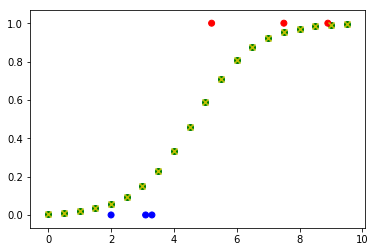

In [9]:
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

samples = np.array([2.0, 3.1, 3.3, 5.2, 7.5, 8.9])
labels = np.array([0, 0, 0, 1, 1, 1])
colors = ['r'*c + 'b'*(1-c) for c in labels]

clf = LogisticRegression(solver='newton-cg', max_iter=20).fit(samples.reshape(len(samples),1), labels)

x = np.arange(0., 10., 0.5)
xm = x.reshape(len(x), 1)

#v = clf.predict(xm)
v = clf.predict_proba(xm)[:,1].reshape(len(x))


print(clf.coef_, clf.intercept_)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

v2 = sigmoid(  x * clf.coef_  + clf.intercept_ ) 
plt.scatter(x, v2, c = 'g')

plt.scatter(samples, labels, c = colors)
plt.scatter(x, v, c = 'y', marker='x')
plt.show()

## Interpretación probabilística

Podemos expresar el resultado de la regresión logística como la probabilidad de pertenencia de una muestra a una clase determinada.

## Ejercicios

Utiliza **regresión logística** para clasificar el dataset Iris.